In [71]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/Concrete_Data.xls')

In [72]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print(x.shape, y.shape)

(1030, 8) (1030,)


In [73]:
from sklearn.model_selection import train_test_split

##splitting the data into train test dataset with the same distribution as of assignment 1 

In [74]:
x_train1, x_test1, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 21, stratify= None)

In [75]:
x_train1

array([[ 190.34,    0.  ,  125.18, ..., 1079.  ,  798.9 ,  100.  ],
       [ 289.  ,    0.  ,    0.  , ...,  913.2 ,  895.3 ,   90.  ],
       [ 194.68,    0.  ,  100.52, ...,  998.  ,  901.8 ,   14.  ],
       ...,
       [ 237.5 ,  237.5 ,    0.  , ...,  932.  ,  594.  ,    7.  ],
       [ 382.  ,    0.  ,    0.  , ..., 1047.  ,  739.  ,    7.  ],
       [ 266.2 ,  112.3 ,   87.5 , ...,  909.7 ,  744.5 ,   28.  ]])

In [76]:
x_train1[0]

array([ 190.34,    0.  ,  125.18,  166.61,    9.88, 1079.  ,  798.9 ,
        100.  ])

In [77]:
y_train.shape

(721,)

In [78]:
x_test1.shape

(309, 8)

##Q1. normal equation

In [79]:
#adding bias term
x_ = np.ones((len(x_train1),1))
x_train = np.append(x_train1, x_, axis = 1)

In [80]:
x_train.shape

(721, 9)

In [81]:
# adding bias 
w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
w

array([ 1.13531204e-01,  9.87911870e-02,  7.74633009e-02, -1.48770754e-01,
        3.72006901e-01,  1.38482979e-02,  1.62110814e-02,  1.09648974e-01,
       -1.39272794e+01])

In [ ]:
#predict
y_predn = x_train.dot(w)
y_predn 

In [83]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_train, y_predn)

109.6188499351555

In [84]:
r2_score(y_train, y_predn)

0.5918957708762256

In [85]:
x_ = np.ones((len(x_test1),1))
x_test = np.append(x_test1, x_, axis = 1)

In [ ]:
y_predte = x_test.dot(w)
y_predte 

In [87]:
mean_squared_error(y_test, y_predte)

102.49790694063606

In [88]:
r2_score(y_test, y_predte)

0.6610280560044763

##mean squared error:
1. using sklearn = 102.49790694063597
2. using normal equations = 102.49790694063606

## r2 score 
1. using sklearn = 0.6610280560044766
2. using normal equations = 0.6610280560044763


##observations using Normal equation method as compared to sklearn linear regression for test data:
1. mean square error increased in 12th decimal place which can be neglected.
the percentage change is 5.6 *10^-13.
2. r2 score decreased with a very very small value (in 14th decimal)  

In [89]:
import matplotlib.pyplot as plt

test plot

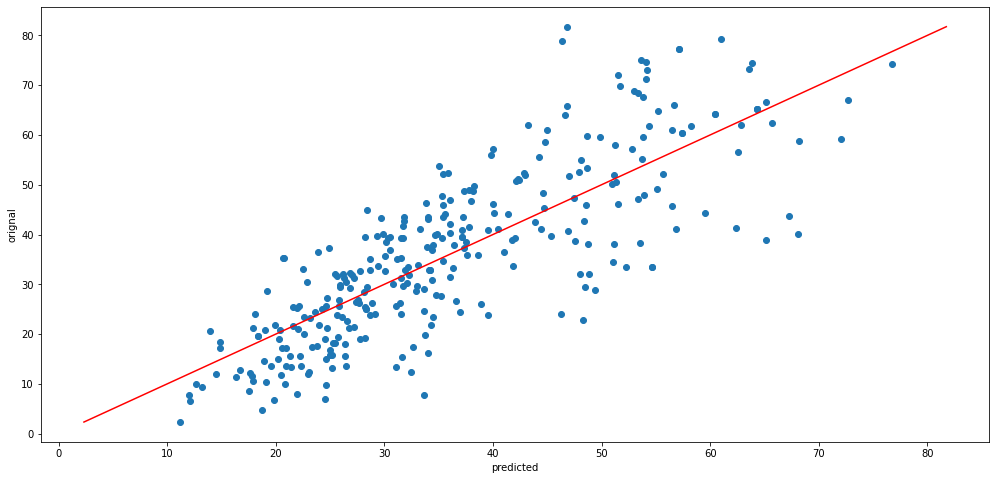

In [90]:
plt.figure(figsize=[17,8])
plt.scatter(y_predte,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

train plot

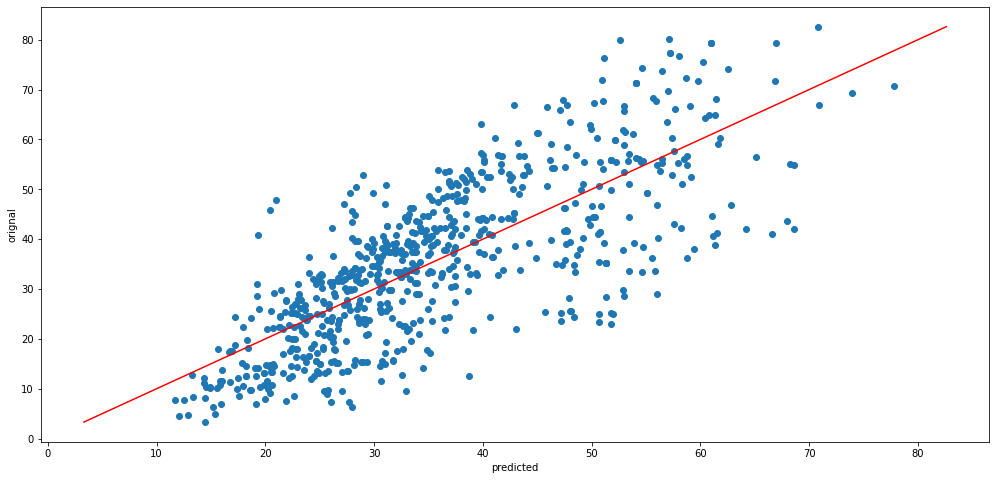

In [91]:
#plot for training dataset
plt.figure(figsize=[17,8])
plt.scatter(y_predn,y_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

comparision of obtained test predictions

In [92]:
x_predict = list(x_test.dot(w))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df)

,predicted_values,original_values
0,23.178644,23.245191
1,17.893638,10.535193
2,12.045468,7.839342
3,45.365078,39.699339
4,46.324371,78.800212
...,...,...
304,36.411069,37.917043
305,38.129156,48.718374
306,20.687359,35.225329
307,54.144392,72.994824


##l2_regularization

## 1. performing ridge regularization with scikit- learn using closed- form solution for linear regression (normal equation) using solver 'cholesky' 

**note**: the l2 regularization in this method carries some approximations

In [93]:
# L2 - Ridge

from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha = 0.1, solver = 'cholesky')
ridgeModel = ridgeModel.fit(x_train,y_train)
predictions_Ridge = ridgeModel.predict(x_test)
rmse_Ridge = mean_squared_error(predictions_Ridge,y_test)
rmse_Ridge

102.49787903050444

In [94]:
# L2 - Ridge

from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha = 1, solver = 'cholesky')
ridgeModel = ridgeModel.fit(x_train,y_train)
predictions_Ridge = ridgeModel.predict(x_test)
rmse_Ridge = mean_squared_error(predictions_Ridge,y_test)
rmse_Ridge

102.49762789335333

In [95]:
# L2 - Ridge

from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha = 2.1)
ridgeModel = ridgeModel.fit(x_train,y_train)
predictions_Ridge = ridgeModel.predict(x_test)
rmse_Ridge = mean_squared_error(predictions_Ridge,y_test)

print(rmse_Ridge)

102.49732107997642


In [96]:
# L2 - Ridge

from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha = 0.000001)
ridgeModel = ridgeModel.fit(x_train,y_train)
predictions_Ridge = ridgeModel.predict(x_test)
rmse_Ridge = mean_squared_error(predictions_Ridge,y_test)
rmse_Ridge


102.49790694035688

## 2. applying l2 regularization analytically on normal equation


In [97]:
I = np.identity(9)
I

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [98]:
I

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [116]:
k= 0.001
I = np.identity(9)
I[0,0] = 0.
w = np.linalg.inv(x_train.T.dot(x_train) + k*I).dot(x_train.T).dot(y_train)
w

array([  0.11349554,   0.09874909,   0.07741556,  -0.14895035,
         0.37184842,   0.0138054 ,   0.01616236,   0.10964716,
       -13.79842186])

In [ ]:
y_predte = x_test.dot(w)
y_predte

In [118]:
mean_squared_error(y_test, y_predte)

102.49910172708303

In [119]:
r2_score(y_test, y_predte)

0.6610241047132092

note: not considering the value of m in the equation as it is very large and overpowers the minute change that could be seen, also considering m ultimatesly results in hugely increasing the considered value of k to more than 1.
the k, considered here is inclusive of all the constants like m.

In [112]:
k= 0.1
I = np.identity(9)
I[0,0] = 0.
w = np.linalg.inv(x_train.T.dot(x_train) + k*I).dot(x_train.T).dot(y_train)
y_predte = x_test.dot(w)
print(mean_squared_error(y_test, y_predte), r2_score(y_test, y_predte))

102.56687324446774 0.6607999767901998


In [114]:
k= 10
I = np.identity(9)
I[0,0] = 0.
w = np.linalg.inv(x_train.T.dot(x_train) + k*I).dot(x_train.T).dot(y_train)
y_predte = x_test.dot(w)
print(mean_squared_error(y_test, y_predte), r2_score(y_test, y_predte))

102.65084439640702 0.6605222748793803


In [120]:
k= 0.0001
I = np.identity(9)
I[0,0] = 0.
w = np.linalg.inv(x_train.T.dot(x_train) + k*I).dot(x_train.T).dot(y_train)
y_predte = x_test.dot(w)
print(mean_squared_error(y_test, y_predte), r2_score(y_test, y_predte))

102.49802719810728 0.6610276582996839


##observations:
1. with decrease in regularization factor, the mse and r2 score are seen to be improving.
2. with high value of regularization factor, the mse and r2 score are seen to be worsening.
3. with the application of l2 regularization the with k=0.0001 (best out of the trials), mse increased by 6.53 * 10^-5 %
4. r2 score decreased by 6.05 * 10^-5 %
5. Complex models, like the Random Forest, Neural Networks, and XGBoost are more prone to overfitting. Simpler models, like linear regression typically overfit  when there are more features than the number of instances in the training data. 
6. in this dataset, the number of features are less than the number of datapoints, so it is less susceptable to overfit. 
7. this can be a reason that very less change is seen in the mse and r2 score with application of l2 score with normal equation. 

## Q-3: quadratic regression

In [ ]:
x_poly = np.square(x)

x_poly1 = np.ones((len(x_poly),1))

x_polyx1 = np.append(x, x_poly, axis = 1)
x_polyf = np.append(x_polyx1, x_poly1, axis = 1)
#x_polyx = np.append(x, x_poly11)
x_polyf

In [104]:
x_polyf.shape

(1030, 17)

## number of input features with quadratic regression: 17 

In [130]:
x_trainpoly, x_testpoly, y_trainpoly, y_testpoly = train_test_split(x_polyf,y, test_size = 0.30, random_state = 21, stratify= None)

In [131]:
w_poly = np.linalg.inv(x_trainpoly.T.dot(x_trainpoly)).dot(x_trainpoly.T).dot(y_trainpoly)
w_poly

array([ 1.45500079e-01,  1.25151168e-01,  8.84320497e-02, -4.43653564e-01,
        8.72029750e-01, -1.26474852e-01,  2.53637118e-01,  3.62505371e-01,
       -5.97583110e-05, -1.57981572e-04, -2.78095522e-04,  7.96005225e-04,
       -3.17216133e-02,  6.82132152e-05, -1.59233949e-04, -8.21431246e-04,
       -1.22248327e+01])

In [ ]:
y_predpoly = x_testpoly.dot(w_poly)
y_predpoly

In [133]:
mean_squared_error(y_testpoly, y_predpoly)

66.87885601221636

In [134]:
r2_score(y_testpoly, y_predpoly)

0.7788242071344191

##Q-3 answers:
a.  number of input features with quadratic regression without bias: 16 

##mean squared error:
1. using sklearn = 102.49790694063597
2. using normal equations = 102.49790694063606
3. using l2 with normal equations: 102.49802719810728 (k = 0.0001)
4. using quadratic regression = 66.87885601221636


## r2 score 
1. using sklearn = 0.6610280560044766
2. using normal equations = 0.6610280560044763
3. using l2 with normal equations = 0.6610276582996839 (k=0.0001)
4. using quadratic regression = 0.7788242071344191

c. there is a significant improvement in the results using quadratic regression.

d. for cubic linear regression model, number of input features, without bias, are 24.
